# Introduction to (astro)statistics

## Probability

The fundamental concept in statistics is the probability, denoted as:

$$P(A)$$

which represents the probability (or our belief) of the occurance of an event $A$.

The basic property of a probability is that

$$ 0 \leq P(A) \leq 1 $$

where 0 is the value of an impossible event, while 1 that of a certain event!

## Probability calculus

1. In most cases, A is not certain. There is a scenario of A not happening. This event is "complementary" to A:

$$ P(A^c) = 1 - P(A) $$

2. This can be extended to a series of alternative scenarios/events: A, B, C, ...

$$ P(A) + P(B) + P(C) + \cdots = 1 $$

> Note that the events are alternatives: they cannot be true all together!

3. Sum rule: the probability of either A or B happening is equal to the sum of the probabilities minus the probability of both happening:

$$ P(A \cup B) = P(A \text{ or } B) = P(A) + P(B) - P(A \cap B) = P(A) + P(B) - P(A \text{ and } B)$$


![AandB](images/A_B.png)

## Conditional probability

The probability of A given B, is the probability of A happening given that B is true as well:

$$ P(A | B) $$

# The continuous case

What if we don't have distinct events, and our set is infinite?

This is typical of continuous variables, such as magnitudes, colors, luminosities, mass, radii, etc.

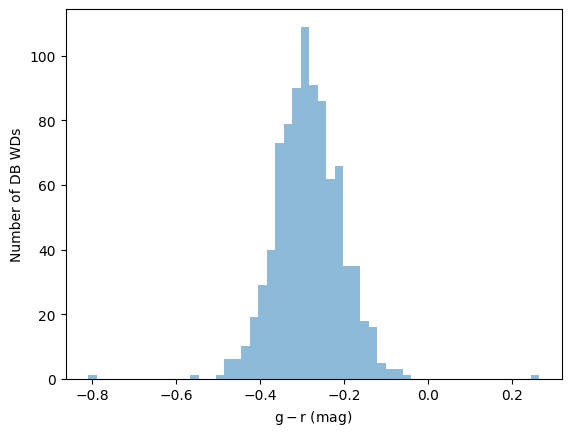

In [78]:
DB_WDs = np.load("data/DB_kleinman.npz")['a']
g_r = DB_WDs["g"] - DB_WDs["r"]

plt.figure()
plt.hist(g_r, bins="fd", alpha=0.5)
plt.xlabel("$g-r$ (mag)")
plt.ylabel("Number of DB WDs")
plt.show()

Q: What is the probability of a DB WD to have $g-r = -0.3$?

In [77]:
print(f"P(g-r = {-0.3:.6f}) = {np.mean(g_r == -0.3):.4f}")

value_close_to_it = g_r[np.argmin(np.abs(g_r + 0.3))]
print(f"P(g-r = {value_close_to_it:.6f}) = {np.mean(g_r == value_close_to_it):.4f}")

P(g-r = -0.300000) = 0.0000
P(g-r = -0.300028) = 0.0011


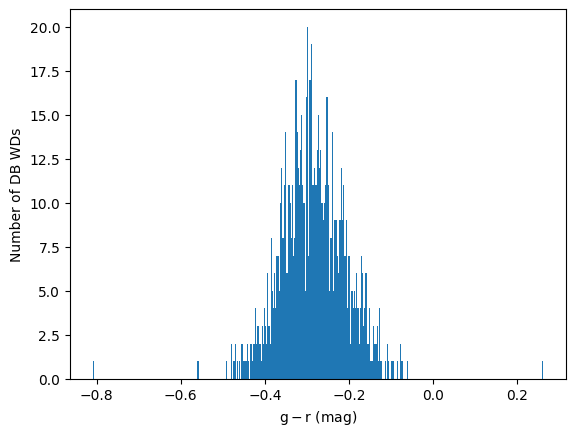

In [80]:
plt.figure()
plt.hist(g_r, bins=400)
plt.xlabel("$g-r$ (mag)")
plt.ylabel("Number of DB WDs")
plt.show()

Consequantly, for continuous $x$, the quantity $P(x)$ will always be 0! On the other hand, we can calculate the probabilities in a given range of values. For example, the probability of $g-r < -0.3$?

$$P(g-r < -0.3)$$

In [82]:
np.mean(g_r < -0.3)

0.4198645598194131

which is complementary to the alternative scenario, $g-r \geq -0.3$:

$$P(g-r \geq -0.3)$$

In [84]:
np.mean(g_r >= -0.3)

0.5801354401805869

Therefore, $P(x)$ can still be used as a **probability density** which is supposed to be multiplied by $dx$:

$$ P(x) \; dx \simeq P(x < x' < x+\Delta x) \; \Delta x$$


The total probability is therefore:

$$ \int\limits_{-\infty}^{+\infty} P(x)\,dx = 1 $$


From this, it's easy to see that...
> ..the probability density $P(x)$ has unit, that of $x^{-1}$

Probability density functions are functions that describe useful probability distributions. The most famous and useful of all... the **normal** or **Gaussian** distribution:

$$ \Large f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left[ -\frac{\left(x-\mu\right)^2}{2\sigma^2} \right] $$

where $\mu$ and $\sigma$ are the mean value and standard deviation. If our data follow the normal distribution, then the sample mean and stadard deviation can be used to express the distribution function with this parametric formula!

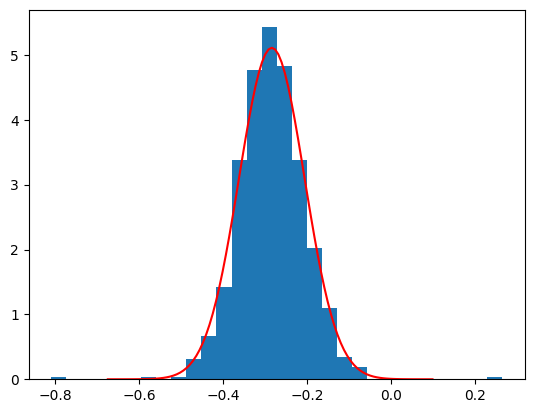

In [89]:
from scipy.stats import norm
sample_mean = np.mean(g_r)
sample_std = np.std(g_r)

distribution = norm(sample_mean, sample_std)
x_values = np.arange(sample_mean-5*sample_std, sample_mean+5*sample_std, sample_std/10.0)

y_values = 1 / np.sqrt(2*np.pi*sample_std**2.0) * np.exp(-(x_values-sample_mean)**2.0/(2*sample_std**2.0))

plt.figure()
plt.hist(g_r, bins=30, density=True)
plt.plot(x_values, y_values, "r-")
# plt.plot(x_values, distribution.pdf(x_values), "r-")
plt.show()

## The cumulative distribution function

Simply, the probability of "less than a value":

$$\Large F(x) = \int\limits_{-\infty}^{x} f(x)\,dx$$

where $f(x)$ is the probability density function.

## Probability mass function

Let's go back to the discrete case! Events A, B, ... do not necessarily have an order. However, the are cases where the events have an order, typically when they are numerical. For example, the numbers of astronmical objects in a certain galaxy/volume/region in Milky Way, or the photon counts in high energy astrophysics, are Possion-distributed.

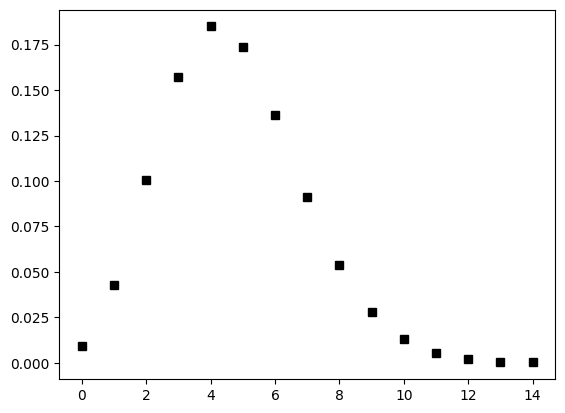

In [92]:
import scipy.stats as st

mean_photon_count = 4.7
distribution = st.poisson(mean_photon_count)

photon_counts = np.arange(0, mean_photon_count*3)
photon_pmf = distribution.pmf(photon_counts)

plt.figure()
plt.plot(photon_counts, photon_pmf, "ks")
plt.show()

This is not a probability density any more. We have a measurable probability for 0, 1, 3, ... photons! We typically use different letter to signify the integer values of such probability mass functions ($k$, $l$, $m$). Thus,

$$ \large \sum\limits_{k=0}^{\infty} P(k) = 1 $$

Let's test this with the values in the plot:

In [93]:
sum(photon_pmf)

0.9998822825234644